In this chapter, we will take a dive into another subcategory of supervised learning: regression analysis.

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')

__CRIM__ - this is the per capita crime rate by town<br>
__ZN__ - this is the proportion of residential land zoned for lots larger than 25,000 sq.ft.<br>
__INDUS__ - this is the proportion of non-retail business acres per town<br>
__CHAS__  - this is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)<br>
__NOX__ - this is the nitric oxides concentration (parts per 10 million)<br>
__RM__ - this is the average number of rooms per dwelling<br>
__AGE__ - this is the proportion of owner-occupied units built prior to 1940<br>
__DIS__ - this is the weighted distances to five Boston employment centers<br>
__RAD__ - this is the index of accessibility to radial highways<br>
__TAX__ - this is the full-value property-tax rate per \$10,000<br>
__PTRATIO__ - this is the pupil-teacher ratio by town<br>
__B__ - this is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town<br>
__LSTAT__ - this is the percentage lower status of the population<br>
__MEDV__ - this is the median value of owner-occupied homes in $1000s<br>

In [2]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns_pp = sns.pairplot(df[cols], height=2.5)
plt.show()

<Figure size 1250x1250 with 30 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

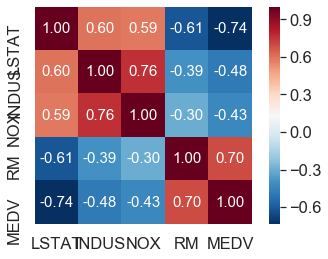

In [6]:
import numpy as np
fig, ax = plt.subplots()
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,)

sns.set(font_scale=1)
# Next line is here in order to fix the bug
ax.set_ylim(len(cols), 0) # https://github.com/matplotlib/matplotlib/issues/14751
plt.show()

# Ordinary Least Squares (OLS)

In implementation of the ADAptive LInear NEuron (Adaline) cost function is the Sum of Squared Errors (SSE) this is identical to the OLS cost function.

In [7]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=220):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_0 = np.zeros(1 + X.shape[1])
        
        self.w_ = np.reshape(self.w_0, (self.w_0.shape[0], 1))
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = 0.5 * (errors**2).sum()
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X.T, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [13]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return X.dot(self.w_[1]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [14]:
X = df[['RM']].values
y = df['MEDV'].values.reshape(-1, 1)

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

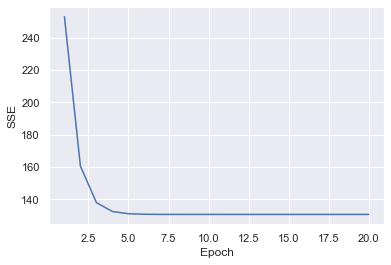

In [15]:
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [17]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue', edgecolor='black', alpha=0.4)
    plt.plot(X, model.predict(X), color='red')
    return None

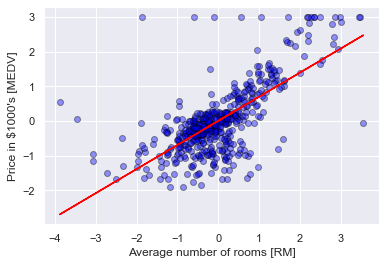

In [18]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')

plt.show()

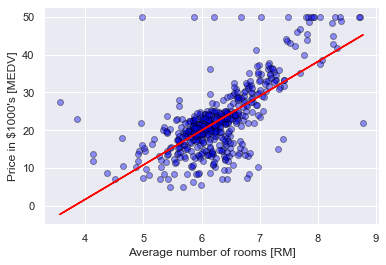

In [19]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [20]:
print('Slope slt: %.3f' % slr.coef_[0])
print('Intercept slr: %.3f' % slr.intercept_)

Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope analytical: %.3f' % w[1])
print('Intercept analytical: %.3f' % w[0])

Slope slt: 9.102
Intercept slr: -34.671
Slope analytical: 9.102
Intercept analytical: -34.671


## Fitting a robust regression model using RANSAC
<br>
We can summarize the iterative RANdom SAmple Consensus (RANSAC) algorithm as follows:

    1. Select a random number of samples to be inliers and fit the model.
    2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers
    3. Refit the model using all inliers.
    4. Estimate the error of the fitted model versus the inliers.
    5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations has been reached; go back to step 1 otherwise.

In [21]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=20,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=20, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

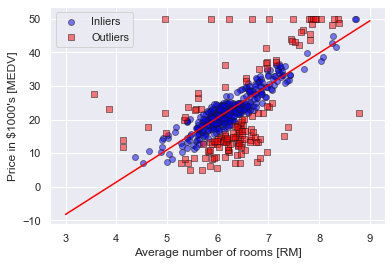

In [22]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=1)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers', edgecolor='k', alpha=0.5)
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='red', marker='s', label='Outliers', edgecolor='k', alpha=0.5)
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [23]:
from sklearn.linear_model import RANSACRegressor
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import rc

class AnimatedScatter(object):
    """An animated RANSACRegressor algorithm"""
    def __init__(self, X, y, max_trials=100, min_samples=3, residual_threshold=5.0, frames=20):
        self.X = X
        self.y = y
        self.max_trials = max_trials
        self.min_samples = min_samples
        self.residual_threshold = residual_threshold
        
        self.frames = frames
        
        self.line_X = np.arange(3, 10, 1)
        self.stream = self.data_stream()
        
        self.fig, self.ax = plt.subplots()
        self.ani = FuncAnimation(self.fig, self.update,
                                 interval=200, frames=self.frames,
                                 init_func=self.setup_plot,
                                 blit=True)
        self.ransac = None
        
    def setup_plot(self):
        """Initial drawing of the scatter plot"""
        inlier, outlier, line_y_ransac  = next(self.stream)

        self.scat_inlier = self.ax.scatter(self.X[inlier], self.y[inlier],
                                           c='blue', marker='o', label='Inliers',
                                           edgecolor='k', alpha=0.5)
        self.scat_outlier = self.ax.scatter(self.X[outlier], self.y[outlier],
                                           c='red', marker='s', label='Outliers',
                                           edgecolor='k', alpha=0.5)
        self.linear_regression_line = self.ax.plot(self.line_X, line_y_ransac, color='red', lw=2)
        
        return self.scat_inlier, self.scat_outlier, self.linear_regression_line,
    
    def data_stream(self):
        """Generate data for new LinearRegression line and in/outlier masks"""
        while True:
            self.ransac = RANSACRegressor(LinearRegression(),
                        max_trials=self.max_trials,
                        min_samples=self.min_samples + 1, #####
                        residual_threshold=self.residual_threshold)
            self.ransac.fit(self.X, self.y)
            inlier_mask = ransac.inlier_mask_
            outlier_mask = np.logical_not(inlier_mask)
            line_y_ransac = self.ransac.predict(self.line_X[:, np.newaxis])
            
            yield [inlier_mask, outlier_mask, line_y_ransac]
            
    def update(self, i):
        """Update the scatter plot"""
        data = next(self.stream)
        
        self.scat_inlier.set_offsets(data[0])
        self.scat_outlier.set_offsets(data[1])
        self.linear_regression_line.set_data(data[2])
        
        return self.scat_inlier, self.scat_outlier, self.linear_regression_line

In [24]:
#a = AnimatedScatter(X, y, max_trials=5, min_samples=3, residual_threshold=2.0)
#HTML(a.ani.to_html5_video())
#a.ani.save('ransac.gif', writer='imagemagick')

In [26]:
#####################################################################################
'''import matplotlib
matplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend

from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(0, 100))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

rectangles = plt.bar([0.5,1,1.5],[50,40,90],width=0.1) #rectangles to animate

patches = lines + list(rectangles) #things to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    #init rectangles
    for rectangle in rectangles:
        rectangle.set_height(0)

    return patches #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data([0, 2], [10 * j,i])

    #animate rectangles
    for j,rectangle in enumerate(rectangles):
        rectangle.set_height(i/(j+1))

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.show()'''
#####################################################################################

"import matplotlib\nmatplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend\n\nfrom matplotlib import pyplot as plt\nfrom matplotlib import animation\n\nfig = plt.figure()\n\nax = plt.axes(xlim=(0, 2), ylim=(0, 100))\n\nN = 4\nlines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate\n\nrectangles = plt.bar([0.5,1,1.5],[50,40,90],width=0.1) #rectangles to animate\n\npatches = lines + list(rectangles) #things to animate\n\ndef init():\n    #init lines\n    for line in lines:\n        line.set_data([], [])\n\n    #init rectangles\n    for rectangle in rectangles:\n        rectangle.set_height(0)\n\n    return patches #return everything that must be updated\n\ndef animate(i):\n    #animate lines\n    for j,line in enumerate(lines):\n        line.set_data([0, 2], [10 * j,i])\n\n    #animate rectangles\n    for j,rectangle in enumerate(rectangles):\n        rectangle.set_height(i/(j+1))\n\n    return patches #return everything that must be updated\n\nanim

In [27]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 9.621
Intercept: -37.137


In [28]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

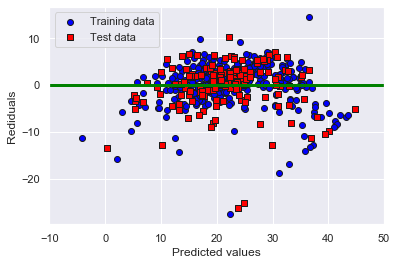

In [30]:
%matplotlib inline
plt.scatter(y_train_pred, y_train_pred-y_train, 
           c='blue', marker='o', edgecolor='k', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='red', marker='s', edgecolor='k', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Rediduals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=3, color='green')
plt.xlim([-10, 50])
plt.show()

## Mean Squared Error (MSE)

In [33]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print(f'Overfitting indicator: {mean_squared_error(y_test, y_test_pred)} > {mean_squared_error(y_train, y_train_pred)}')

MSE train: 19.958, test: 27.196
Overfitting indicator: 27.19596576688345 > 19.958219814238046


In [34]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
      (r2_score(y_train, y_train_pred),
      r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


## Using regularized methods for regression
<br>

- Ridge Regression<br>

- Least Absolute Shrinkage and Selection Operator (LASSO)<br>

- Elastic Net<br>


In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [37]:
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5)

## Turning a linear regression model into a curve - polynomial regression

In [52]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
X.shape

(10, 1)

In [53]:
y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])

In [54]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [55]:
lr.fit(X,y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

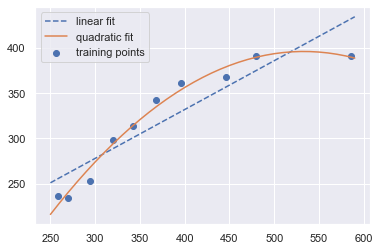

In [56]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit',
         linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [57]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % 
      (mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' %
      (r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Housing Dataset

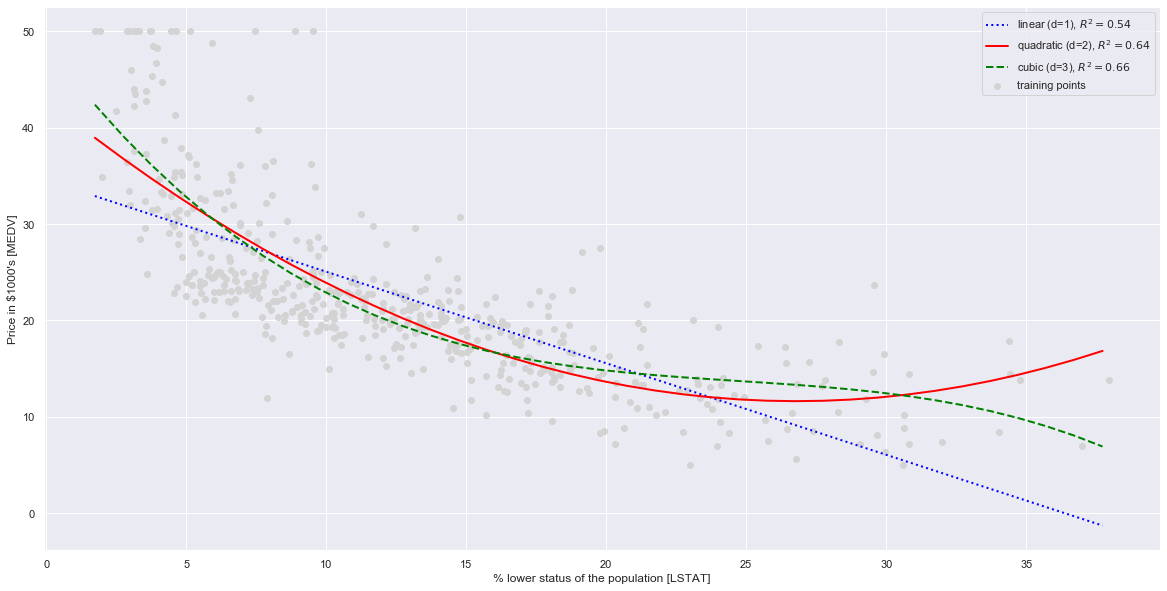

In [63]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

plt.figure(figsize=(20,10))
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$' % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.show()

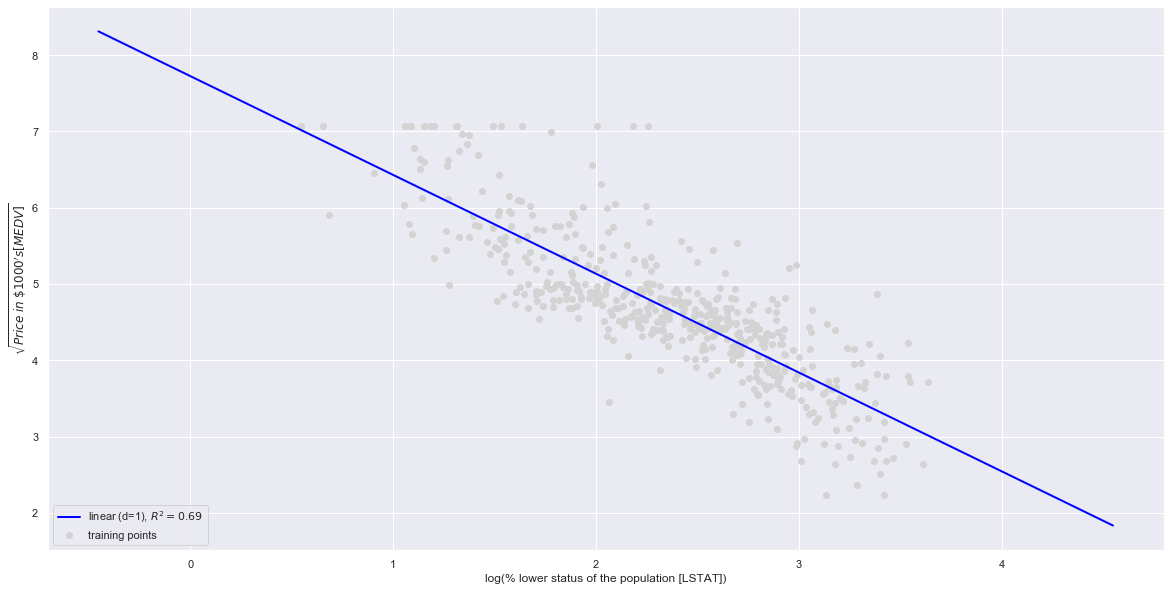

In [65]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min() -1, 
                  X_log.max() +1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

plt.figure(figsize=(20,10))
plt.scatter(X_log, y_sqrt, label='training points',
            color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

## Dealing with nonlinear relationships using random forests

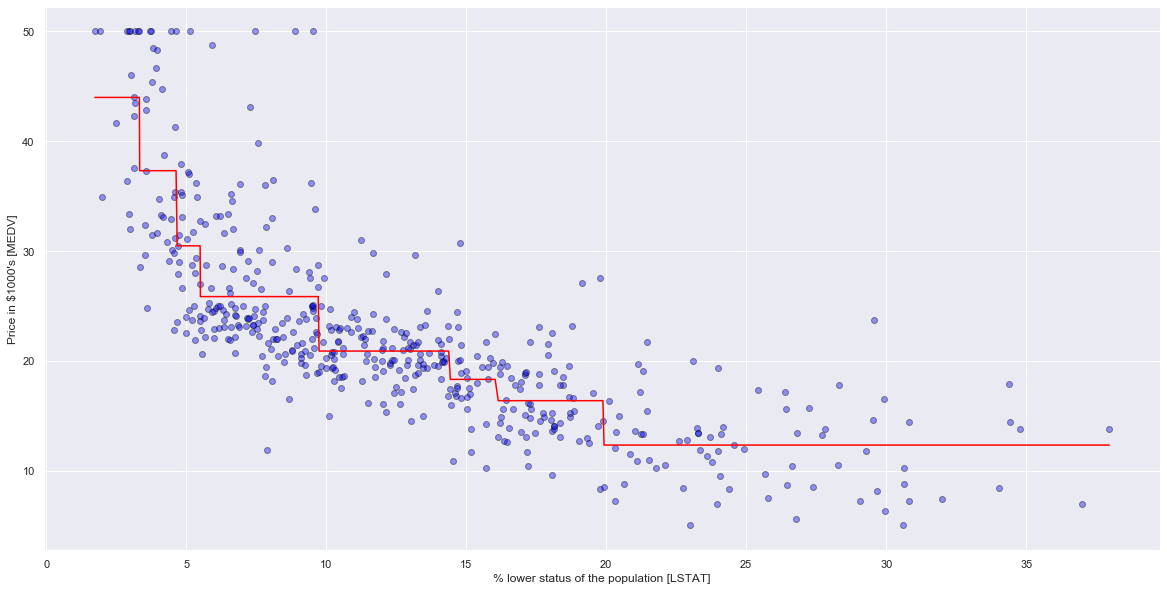

In [72]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(20, 10))
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

## Random forest regression